In [346]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage

In [347]:
df=pd.read_csv("Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [348]:
df.isna().sum()

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


In [349]:
le=LabelEncoder()
for col in df.columns:
  if (df[col].dtypes=="O"):
    df[col]=le.fit_transform(df[col])

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,0,0,446,33,20,NaN,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1


In [350]:
X=df[["CRuns"]]

In [351]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

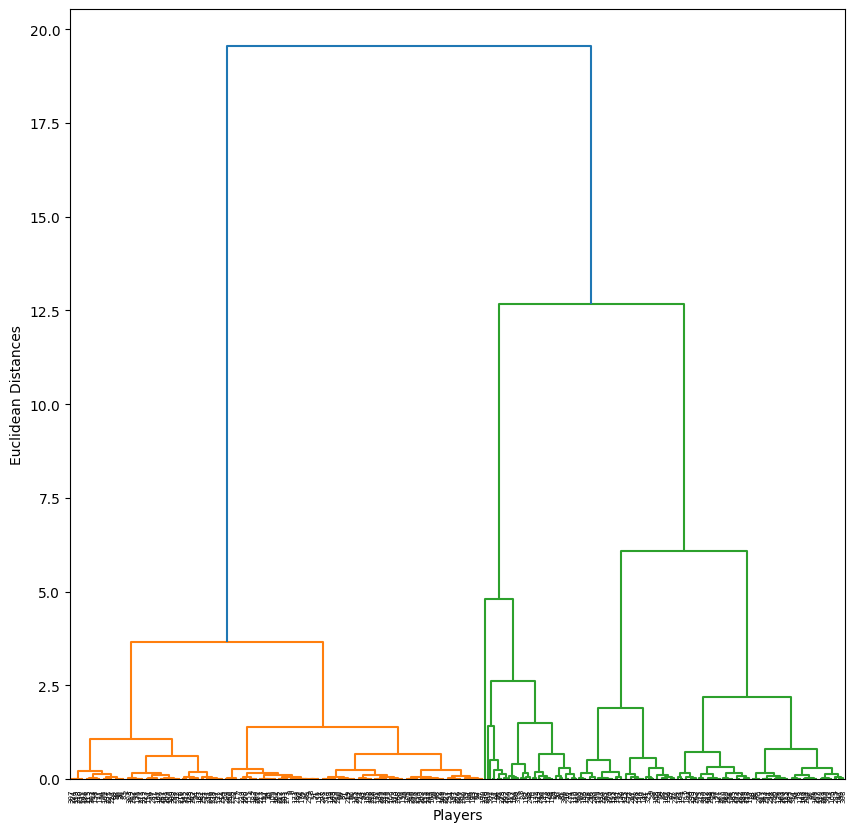

In [352]:
plt.figure(figsize=(10,10))
dendrogram(linkage(X_scaled,method="ward"))
plt.xlabel('Players')
plt.ylabel('Euclidean Distances')
plt.show()

In [353]:
model=AgglomerativeClustering(n_clusters=4,linkage="ward")
df["Cluster"]=model.fit_predict(X_scaled)

In [354]:
df[["CRuns","Cluster"]]

,CRuns,Cluster
0,30,1
1,321,2
2,224,1
3,828,0
4,48,1
...,...,...
317,379,2
318,897,0
319,217,1
320,470,2


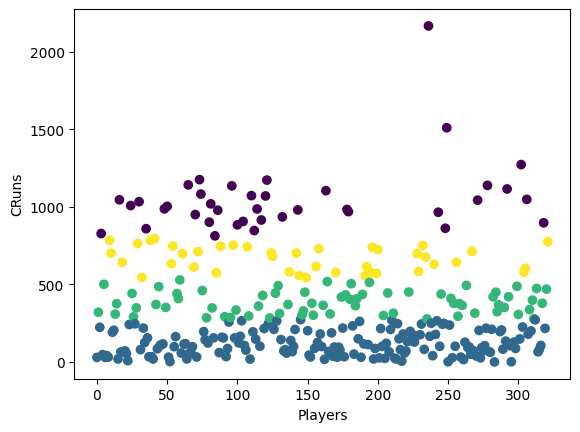

In [355]:
plt.scatter(df.index,df["CRuns"],c=df["Cluster"])
plt.xlabel("Players")
plt.ylabel("CRuns")
plt.show()